# Name :   Mann Dsylva
# Rollno : 24MAI009
Practical 1 

SLP (Single Layer Perceptron) for AND gate

Optimized Weights are [0.02 0.01] and bias is -0.03
Predictions: [0 0 0 1]


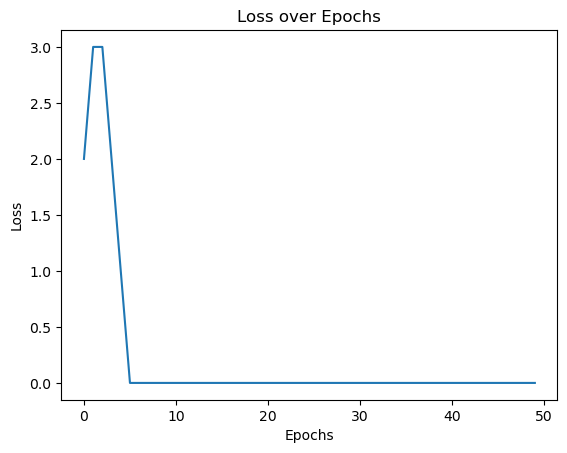

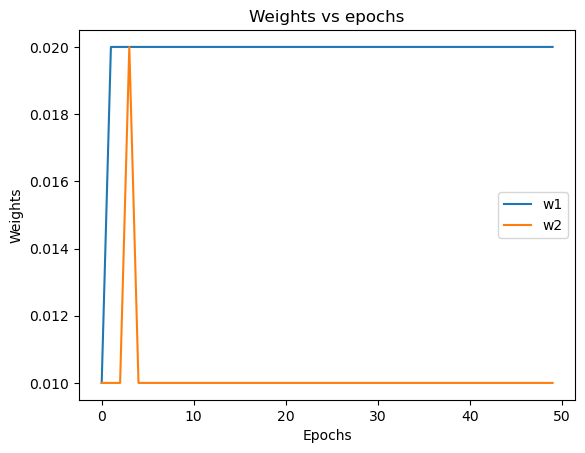

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# AND gate
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([0, 0, 0, 1])

# Learning rate and epochs
lr = 0.01
epochs = 50

class SLP:

    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, Y):
        self.weights = np.zeros(X.shape[1])
        self.All_loss=[]     #stores all values of loss for each epochs
        self.Weights1=[]
        self.Weights2=[]
        self.bias = 0
        for epoch in range(self.epochs):
            total_loss=0
            for j in range(X.shape[0]):
                y_pred = self.Activation_F(np.dot(self.weights, X[j]) + self.bias)
                error = Y[j] - y_pred
                self.weights += self.lr * error * X[j]
                self.bias += self.lr * error
                total_loss+=error**2 
            self.Weights1.append(self.weights[0])
            self.Weights2.append(self.weights[1])
            self.All_loss.append(total_loss)   
        print(f"Optimized Weights are {self.weights} and bias is {self.bias}")

    def Activation_F(self, activation):
        return 1 if activation >= 0 else 0

    def Prediction(self, X):
        sum = np.dot(X, self.weights) + self.bias
        return np.array([self.Activation_F(s) for s in sum])

slp = SLP(lr=lr, epochs=epochs)
slp.fit(X, Y)

predictions = slp.Prediction(X)
print("Predictions:", predictions)    #prints the prediction values
#graph of change in loss with epochs
plt.plot(range(epochs), slp.All_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

#graph of change in weights with epochs
plt.plot(range(epochs),slp.Weights1,label='w1')
plt.plot(range(epochs),slp.Weights2,label='w2')
plt.xlabel('Epochs')
plt.ylabel('Weights')
plt.title('Weights vs epochs')
plt.legend()
plt.show()